In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [41]:
name = 'MW4iso_fg0.2_MHG0.25_RC9'
name_plop = 'MW4_MHG0.25_GSE2N_plop'

In [57]:
sn = {}
sn[0] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4/output', 0, combineFiles=True)
sn[100] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4/output', 100, combineFiles=True)
sn[800] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4/output', 800, combineFiles=True)

In [58]:
sn_ad = {}
sn_ad[0] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4-adiabatic/output', 0, combineFiles=True)
sn_ad[100] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4-adiabatic/output', 100, combineFiles=True)
sn_ad[800] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4-adiabatic/output', 800, combineFiles=True)

In [50]:
sn_plop_ad = {}
sn_plop_ad[0]   = arepo.Snapshot(basepath + 'runs/' + name_plop + '/lvl4-adiabatic/output', 
                                 0, combineFiles=True)
sn_plop_ad[100] = arepo.Snapshot(basepath + 'runs/' + name_plop + '/lvl4-adiabatic/output', 
                                 100, combineFiles=True)
sn_plop_ad[800] = arepo.Snapshot(basepath + 'runs/' + name_plop + '/lvl4-adiabatic/output', 
                                 800, combineFiles=True)

In [52]:
sn_plop = {}
sn_plop[0]   = arepo.Snapshot(basepath + 'runs/' + name_plop + '/lvl4/output', 
                                 0, combineFiles=True)
sn_plop[100] = arepo.Snapshot(basepath + 'runs/' + name_plop + '/lvl4/output', 
                                 100, combineFiles=True)
# sn_plop[800] = arepo.Snapshot(basepath + 'runs/' + name_plop + '/lvl4/output', 
                                 # 800, combineFiles=True)

In [3]:
def gas_profile(sni, rmax=150, dr=1):
    center = np.array([sni.BoxSize, sni.BoxSize, sni.BoxSize])/2.
    
    # print(center)
    pos = sni.part0.pos.value - center
    r = np.linalg.norm(pos, axis=1)
    
    # print(np.min(r))
    
    rmin = 0
    
    out = {}
    out['rlist'] = []
    out['rholist'] = []
    
    while rmin < rmax:
        key = np.logical_and(r >= rmin, r < rmin + dr)
        
        Menc = np.sum(sni.part0.mass.value[key])
        vol = (4 * np.pi/3.) * ((rmin + dr)**3 - rmin**3)
        
        aver = np.mean(r[key])
        
        out['rlist'].append(aver)
        out['rholist'].append(Menc/vol)
        
        rmin += dr
    
    out['rlist'] = np.array(out['rlist'])
    out['rholist'] = np.array(out['rholist'])
    
    return out

In [53]:
prof = {}
prof[0] = gas_profile(sn[0])
prof[100] = gas_profile(sn[100])
prof[800] = gas_profile(sn[800])

prof_plop = {}
prof_plop[0] = gas_profile(sn_plop[0])
prof_plop[100] = gas_profile(sn_plop[100])
# prof_plop[800] = gas_profile(sn_plop[800])

prof_plop_ad = {}
prof_plop_ad[0] = gas_profile(sn_plop_ad[0])
prof_plop_ad[100] = gas_profile(sn_plop_ad[100])
prof_plop_ad[800] = gas_profile(sn_plop_ad[800])

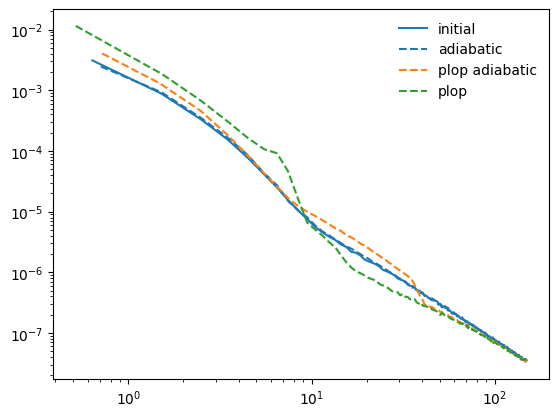

In [56]:
l = plt.plot(prof[0]['rlist'], prof[0]['rholist'], label='initial')
plt.plot(prof[100]['rlist'], prof[100]['rholist'], c=l[0].get_color(), ls='dashed', label='adiabatic')

# l = plt.plot(prof_plop[0]['rlist'], prof_plop[0]['rholist'])
# plt.plot(prof_plop[100]['rlist'], prof_plop[100]['rholist'], c=l[0].get_color(), ls='dashed')
plt.plot(prof_plop_ad[100]['rlist'], prof_plop_ad[100]['rholist'], ls='dashed', label='plop adiabatic')

plt.plot(prof_plop[100]['rlist'], prof_plop[100]['rholist'], ls='dashed', label='plop')

plt.legend(frameon=False)
# plt.xlim(0, None)
plt.yscale('log')
plt.xscale('log')

## decreasing vphi

In [4]:
name = 'MW4iso_fg0.2_MHG0.25_RC9_vphi0.1'
lvl = 'lvl4-adi'

In [15]:
sn = {}
sn[0] = arepo.Snapshot(basepath + 'runs/' + name + '/' + lvl + '/output', 0, combineFiles=True)
sn[250] = arepo.Snapshot(basepath + 'runs/' + name + '/' + lvl + '/output', 250, combineFiles=True)

In [16]:
prof = {}
for idx in sn.keys():
    prof[idx] = gas_profile(sn[idx])

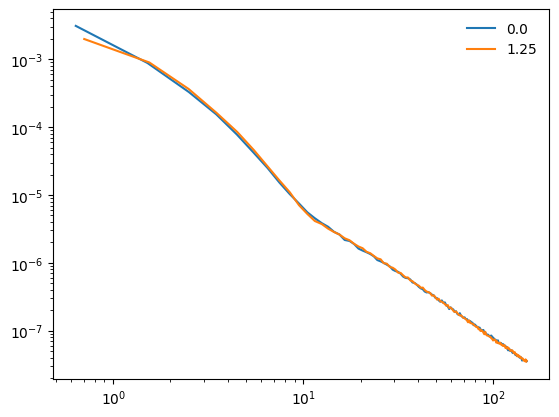

In [17]:
for idx in prof.keys():
    plt.plot(prof[idx]['rlist'], prof[idx]['rholist'], label=str(round(sn[idx].Time.value, 4)))

plt.legend(frameon=False)
plt.yscale('log')
plt.xscale('log')